# Analysis of Presidential Speeches

## Imports and Data collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
ts = pd.read_csv('presidential_speeches.csv')

In [3]:
ts

,title,president,transcript,url
0,"May 31, 2024: Remarks on the Middle East",Joe Biden Presidency,"THE PRESIDENT: Hello, folks. (The President ch...",https://millercenter.org/the-presidency/presid...
1,"March 7, 2024: State of Union Address",Joe Biden Presidency,"Good evening. Good evening. If I were smart, I...",https://millercenter.org/the-presidency/presid...
2,"January 5, 2024: Speech on the Third Anniversa...",Joe Biden Presidency,"THE PRESIDENT: Thank you, thank you, thank you...",https://millercenter.org/the-presidency/presid...
3,"October 20, 2023: Remarks on the US Response i...",Joe Biden Presidency,"Good evening, my fellow Americans. We’re facin...",https://millercenter.org/the-presidency/presid...
4,"February 21, 2023: Remarks on the One-Year Ann...",Joe Biden Presidency,"THE PRESIDENT: Hello, Poland! One of our grea...",https://millercenter.org/the-presidency/presid...
...,...,...,...,...
1045,"December 29, 1790: Talk to the Chiefs and Coun...",George Washington Presidency,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...
1046,"December 8, 1790: Second Annual Message to Con...",George Washington Presidency,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
1047,"January 8, 1790: First Annual Message to Congress",George Washington Presidency,Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
1048,"October 3, 1789: Thanksgiving Proclamation",George Washington Presidency,Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...


## Perform initial cleaning of President names

In [4]:
def clean_president_name(president_label):
    # Remove everything after "Presidency"
    return re.sub(r'\s*Presidency.*$', '', president_label)

# Apply the cleaning function to the president column
ts['president'] = ts['president'].apply(clean_president_name)

In [5]:
len(ts['president'].unique())

45

## Begin EDA

In [6]:
# Calculate the length of each speech
ts['speech_length'] = ts['transcript'].apply(lambda x: len(x.split()))

In [7]:
# EDA: Number of speeches given by each president
speeches_count = ts['president'].value_counts().reset_index()
speeches_count.columns = ['president', 'number_of_speeches']

In [8]:
# EDA: Average length of speeches by each president
avg_speech_length = ts.groupby('president')['speech_length'].mean().reset_index()
avg_speech_length.columns = ['president', 'average_speech_length']

In [9]:
# EDA: Summary statistics of speech lengths
summary_stats = ts['speech_length'].describe()

In [ ]:
# Display summary statistics
print(summary_stats)

## Plotting

/tmp/ipykernel_425269/454063095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_speeches', y='president', data=speeches_count, palette='viridis')


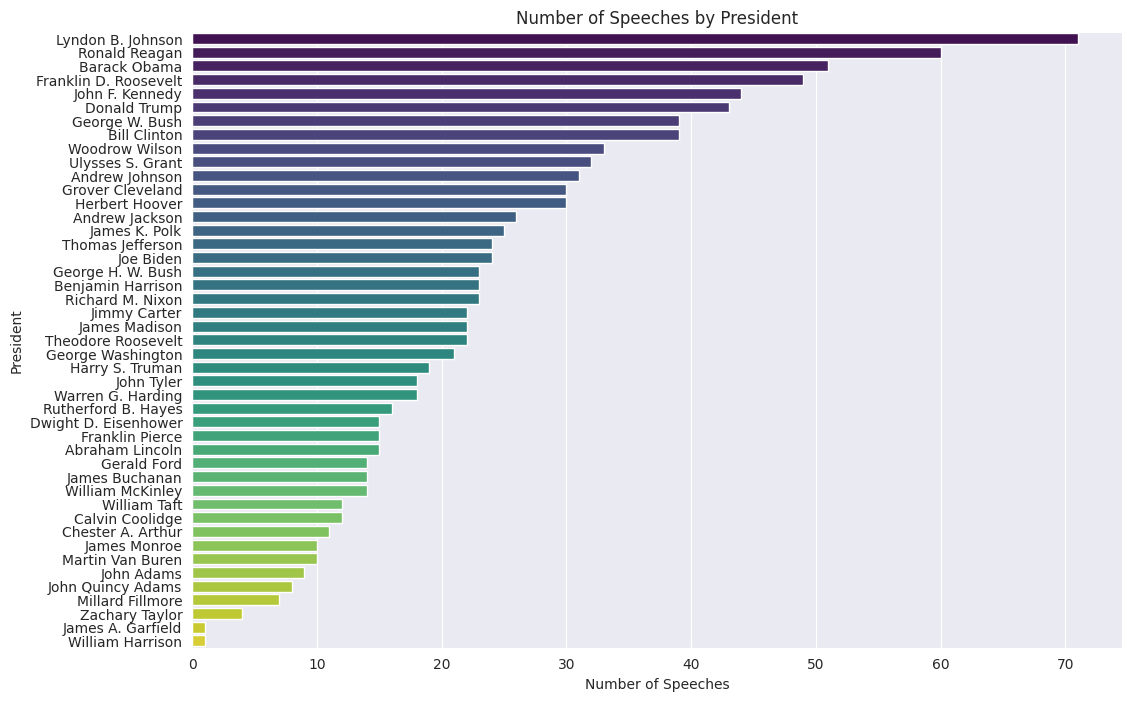

In [11]:
# Plot: Number of speeches by president
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_speeches', y='president', data=speeches_count, palette='viridis')
plt.title('Number of Speeches by President')
plt.xlabel('Number of Speeches')
plt.ylabel('President')
plt.show()

/tmp/ipykernel_425269/4016795522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_speech_length', y='president', data=avg_speech_length, palette='viridis')


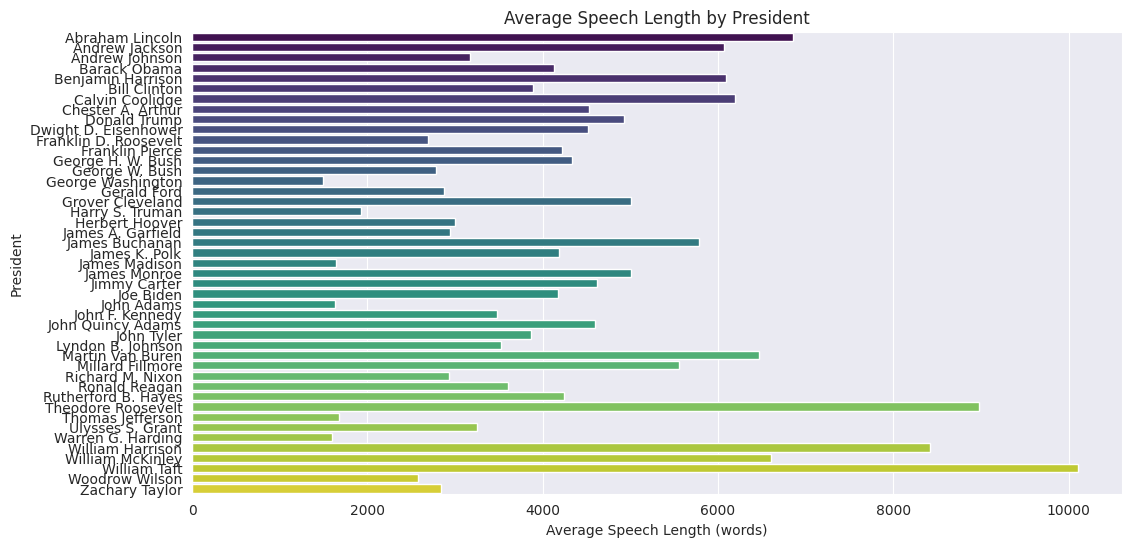

In [12]:
# Plot: Average speech length by president
plt.figure(figsize=(12, 6))
sns.barplot(x='average_speech_length', y='president', data=avg_speech_length, palette='viridis')
plt.title('Average Speech Length by President')
plt.xlabel('Average Speech Length (words)')
plt.ylabel('President')
plt.show()

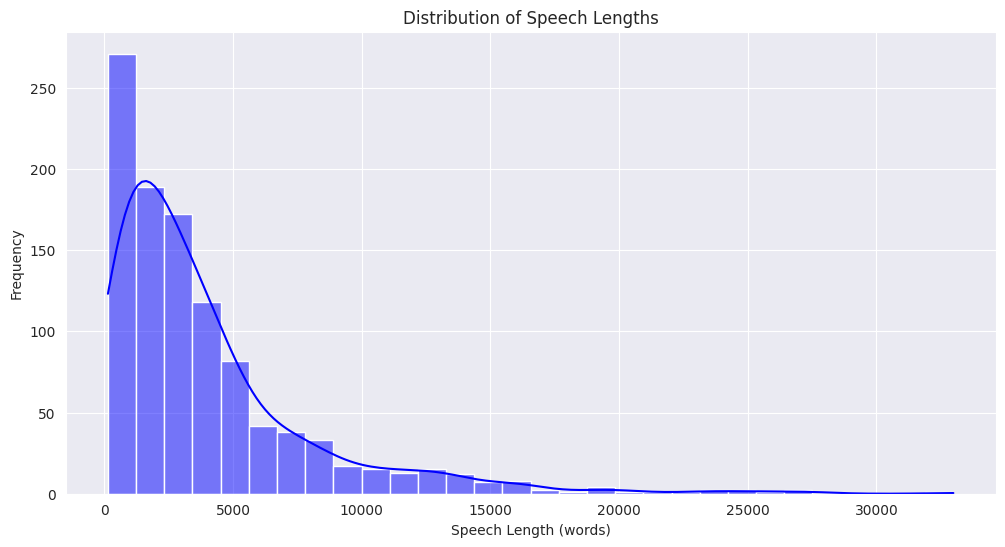

In [13]:
# Plot: Distribution of speech lengths
plt.figure(figsize=(12, 6))
sns.histplot(ts['speech_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length (words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Save the cleaned data and EDA results to CSV files
ts.to_csv('cleaned_presidential_speeches.csv', index=False)
speeches_count.to_csv('presidential_speeches_count.csv', index=False)
avg_speech_length.to_csv('presidential_speeches_avg_length.csv', index=False)



count     1050.000000
mean      3963.289524
std       4170.143145
min        135.000000
25%       1174.250000
50%       2698.500000
75%       4873.500000
max      32994.000000
Name: speech_length, dtype: float64
